In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_diabetes
import sklearn.metrics as metrics


In [2]:
diabetes = load_diabetes()


In [3]:
diabetes.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)


In [5]:
print(diabetes.DESCR)



.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
df['Target'] = diabetes.target  


In [7]:
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
def eda( df,target):
    df.cov()
    for a in df.columns:
        sns.scatterplot(x=df[a],y= df[target])
        plt.show()
    #sns.pairplot(df)
    x = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    print(x.head())
    print(y.head())
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)    
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    print(x_train)
    print(x_test)
    return x_train, x_test, y_train, y_test  


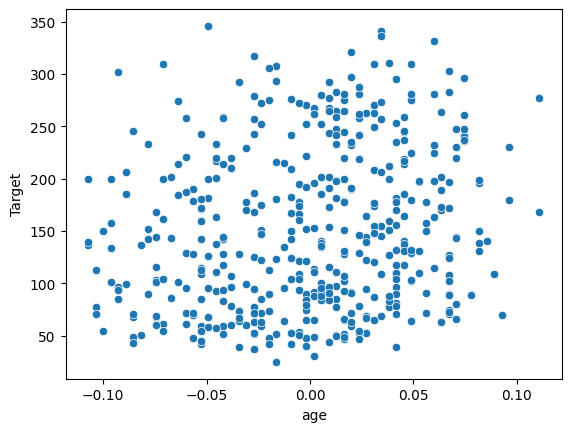

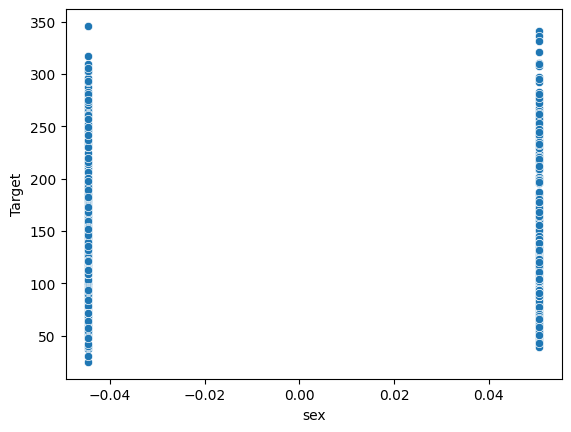

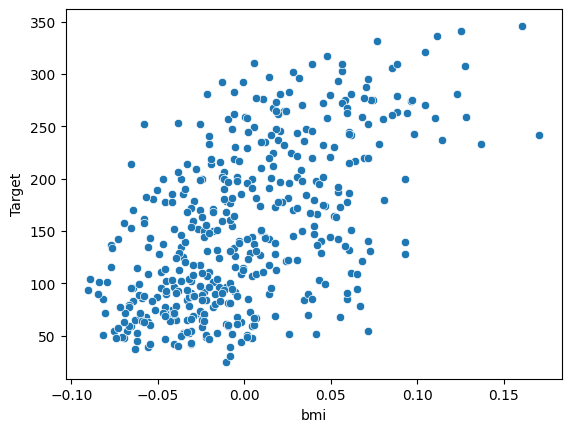

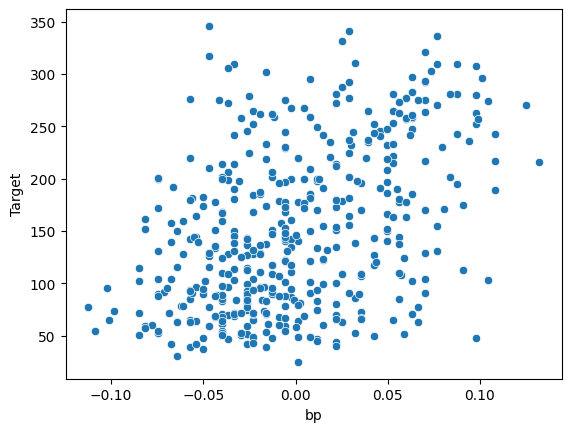

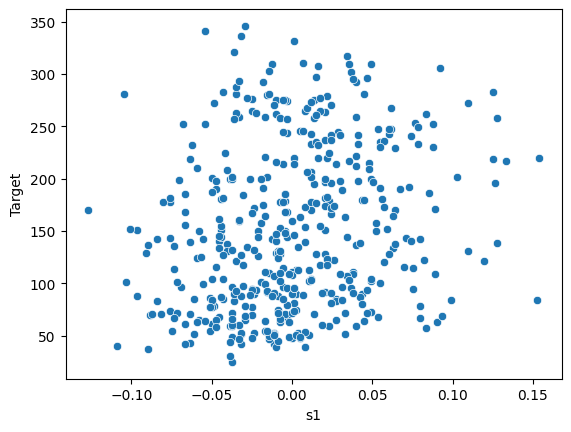

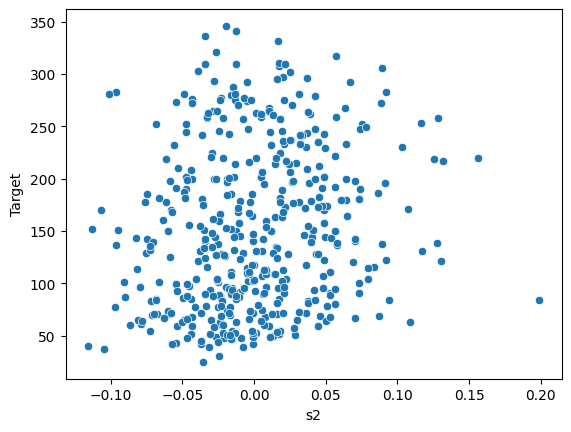

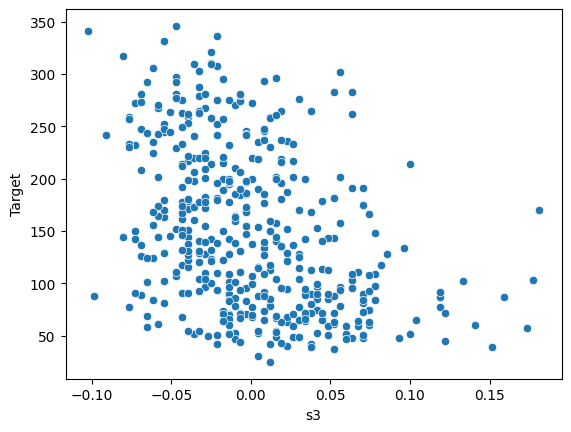

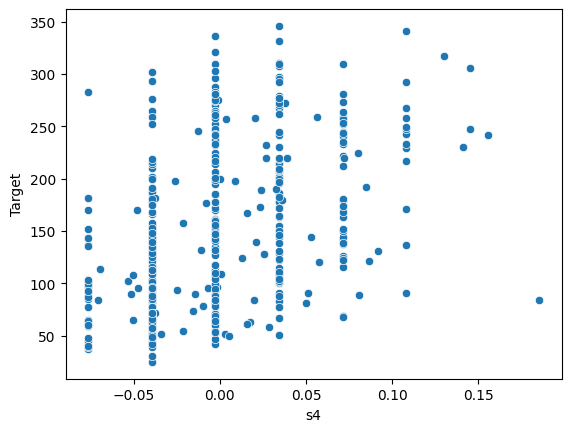

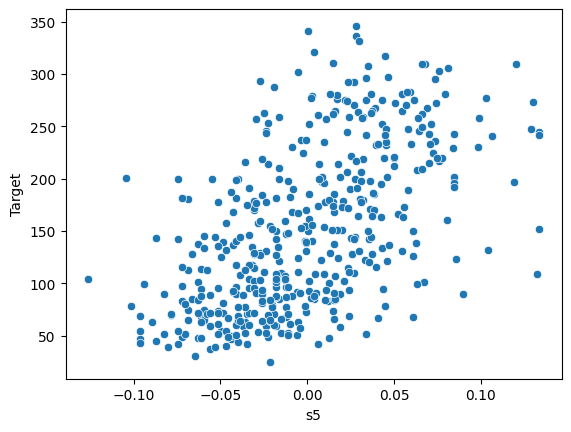

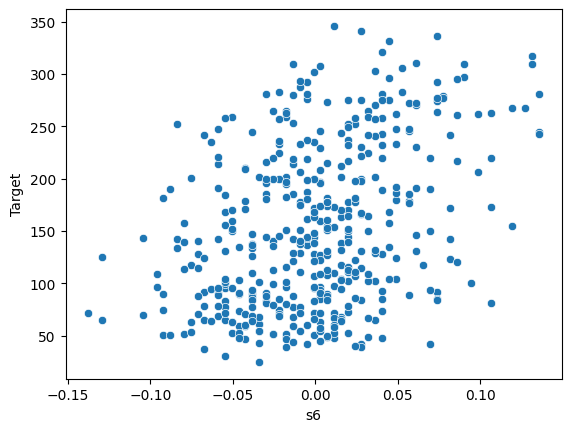

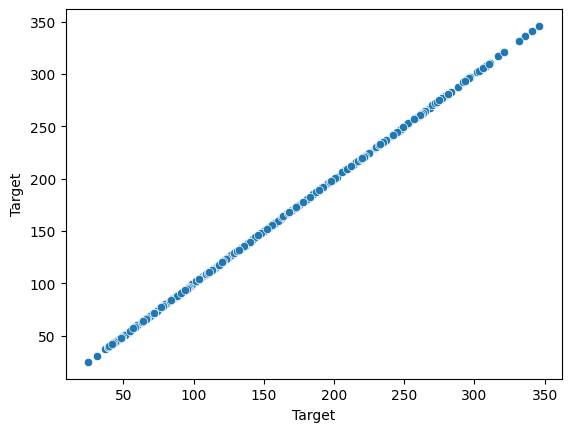

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Target, dtype: float64
[[ 0.24396182  1.02582922  0.06364526 ... -0.83072415  0.07510266
   1.49297091]
 [-2.23157066 -0.97482113 -1.56789685 ... -1.59866429 -0.8697201
  -0.10202047]
 [ 0.54402637  1.02582922 -0.70803006 ... -0.062784   -0.30602734
  -1.02543653]
 ...
 [ 1.21917159 

In [9]:
x_train, x_test, y_train, y_test=eda(df,'Target')


In [10]:
def LinearReg(x_train, x_test, y_train, y_test):
    regressor = LogisticRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    # print(y_pred)
    # print(y_test)
    print(regressor.coef_)
    print(regressor.intercept_)
    print(regressor.get_params())
    residuals = y_test - y_pred
    sns.displot(residuals,kind='kde')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    
    return y_pred, y_test


[[-0.07564346 -0.46028466 -0.00973267 ... -0.30037287 -0.06391325
  -0.26361185]
 [ 0.26301564 -0.41989075  0.14033742 ... -0.27772479 -0.62709734
  -0.40959156]
 [ 0.08424838 -0.29741859 -0.40683638 ... -0.4544639  -0.27299502
  -0.42393452]
 ...
 [ 0.23805655  0.44601618  1.05586085 ... -0.20282496  0.07504481
   0.61912469]
 [ 0.19873507  0.2984908   1.0620538  ...  0.97719755 -0.30808256
   0.10709223]
 [-0.49579521 -0.41838156  1.48524645 ...  0.29522455  0.22329209
  -0.01153619]]
[ 2.20855995e-01 -2.00716766e-01 -1.55317980e+00 -1.67339244e-01
 -1.27019425e+00  5.34868050e-01 -7.78073596e-01  1.30605320e-01
 -1.21020839e+00  7.83866804e-02 -1.41388302e-02  1.77063815e-01
  6.05821965e-01  5.06476482e-01  1.12912891e+00  7.99077375e-02
  3.34758402e-01 -1.70266154e-01  2.85149015e-01  7.69647039e-01
 -1.59879554e-01  7.09403550e-01  4.79377101e-01  6.40188835e-01
  7.43143043e-01 -3.06867374e-01  4.24177939e-01  8.11817404e-01
  5.89831049e-02  9.39082680e-01  7.58547140e-01 -4.0

(array([263., 258., 178.,  72.,  48., 310.,  65., 202., 200., 258., 152.,
         91.,  71.,  55., 275.,  71., 185.,  63., 137., 268., 178.,  85.,
         91., 182., 233., 109.,  48.,  85.,  48.,  91., 252.,  72., 200.,
        128.,  84., 200., 214., 124., 200., 258.,  72.,  94., 109., 152.,
         91.,  65., 109., 200., 116., 257., 178.,  71.,  48., 245., 258.,
        181., 258.,  85.,  84., 202., 258., 200.,  55., 102., 281., 113.,
         72., 268., 233.,  72.,  39., 102.,  51., 141.,  85., 292., 116.,
        220., 275., 109.,  84., 277.,  39., 277.,  77.,  72.,  60., 144.,
        128.]),
 362    321.0
 249    215.0
 271    127.0
 435     64.0
 400    175.0
        ...  
 381    104.0
 213     49.0
 134    103.0
 49     142.0
 52      59.0
 Name: Target, Length: 89, dtype: float64)

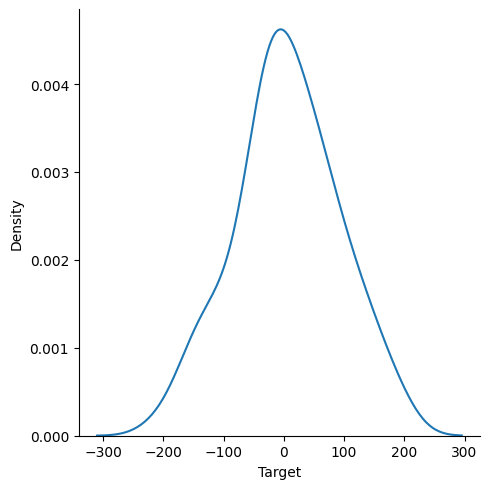

In [11]:
LinearReg(x_train, x_test, y_train, y_test)


In [12]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.keys())
print(housing.DESCR)
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target
df.head()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


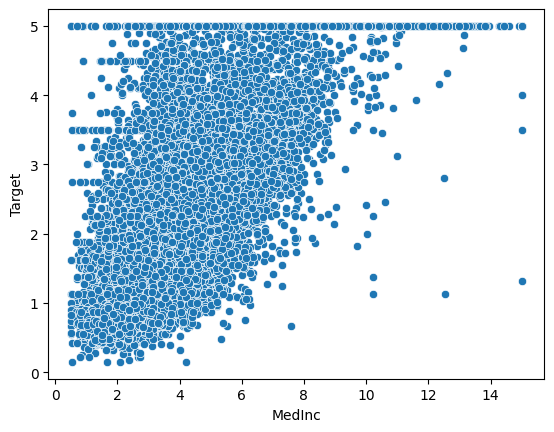

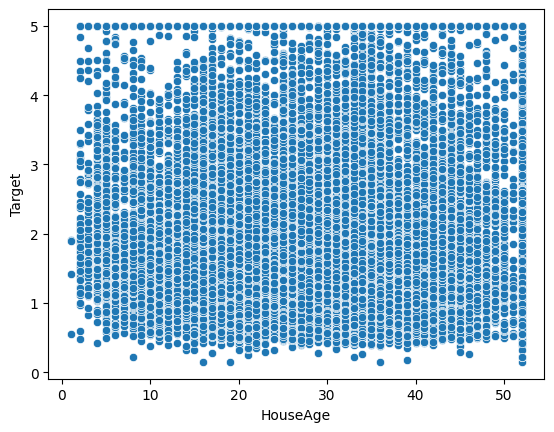

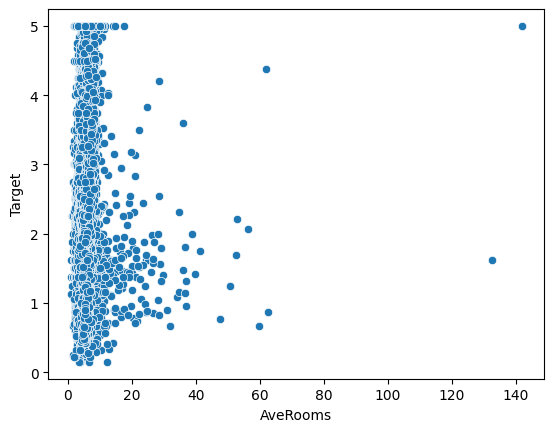

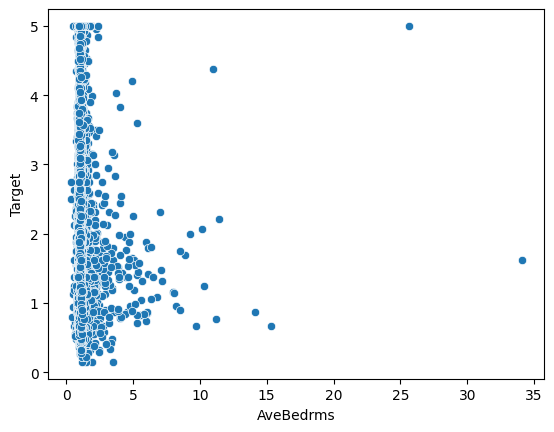

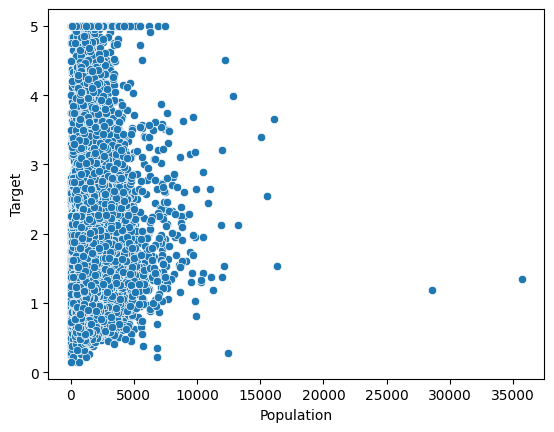

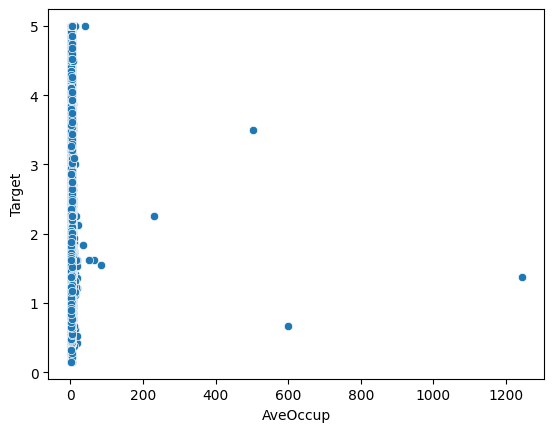

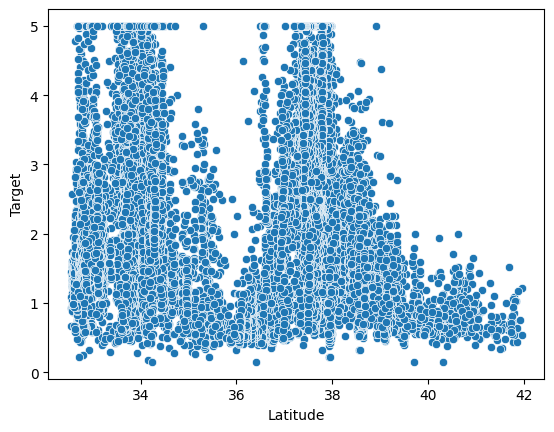

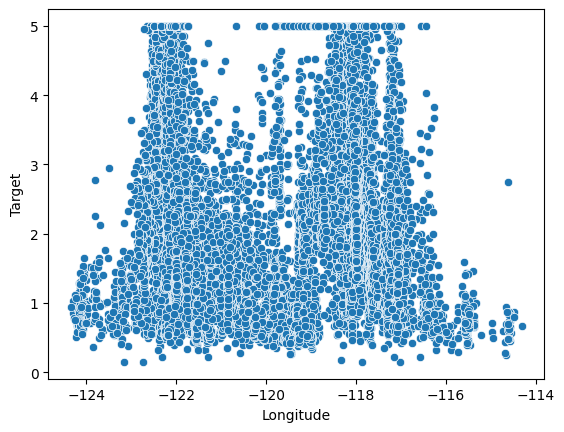

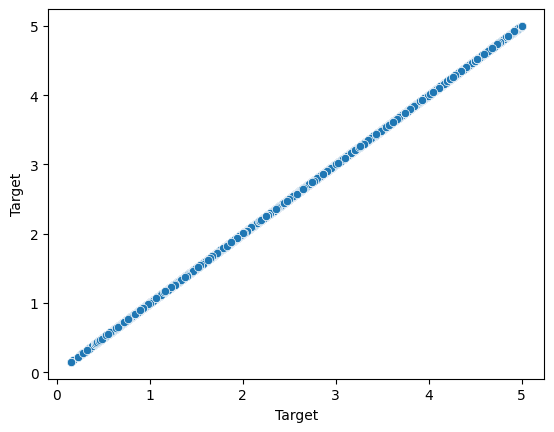

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64
[[ 0.19001247 -1.79507596  0.90771428 ...  0.07408222 -0.8400624
   1.00389865]
 [ 0.26931072  1.85553889 -0.04200187 ...  0.04527606  0.98536392
  -1.43477229]
 [ 0.02989505 -0.20785212 -0.30282448 ... -0.03933216 -0.8400624
   0.77948108]
 ...
 [-0.35589721  0.18895385 -0.70992683 ... -0.19238342  0.44709718
  -1.1654712 ]
 [ 0.92053182  0.42703742 -0.35350337 ... 

In [13]:
x_train, x_test, y_train, y_test=eda(df,'Target')


In [14]:
LinearReg(x_train, x_test, y_train, y_test)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.